## Business Problem Section

In __Bangkok, Thailand__, there are so many problems such as air pollution, traffic congestion, etc. I thought that I'd like to stay away from these problems as far as I can. So, I have a plan to establish my own business in __Chiang Mai, Thailand__ but I have no idea that which business I supposed to do.

This project, I try to analyze different kinds of business venue using Foursquare API getting the location data in Chiang Mai. So, I hope this project will help me to choose the business.

In [1]:
import pandas as pd
import numpy as np

## Data Section

The considering features (attributes) are: __Name__, __Latitude__, __Longitude__, __Venue Category__.  
Firstly, I retrieved the location data of Chiang Mai using Foursquare API while radius is 500 meters. then retrieved the nearby venue from the first data with the same radius. After that, let's get started.

In [2]:
CLIENT_ID = 'QMG2AOEN44O0JRQDHT0XGLWSLZ54YEUEDPMWSJO31KQZHCPR' # your Foursquare ID
CLIENT_SECRET = 'VKOW3UW1SHZLS45ZGNHSB4E4MB1TMTE4YIYKHQFTLJUU1SGH' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QMG2AOEN44O0JRQDHT0XGLWSLZ54YEUEDPMWSJO31KQZHCPR
CLIENT_SECRET:VKOW3UW1SHZLS45ZGNHSB4E4MB1TMTE4YIYKHQFTLJUU1SGH


In [3]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [4]:
address = 'Chiang Mai, TH'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Chiang Mai, TH are 18.7905618, 98.9880909.


In [5]:
radius = 500
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QMG2AOEN44O0JRQDHT0XGLWSLZ54YEUEDPMWSJO31KQZHCPR&client_secret=VKOW3UW1SHZLS45ZGNHSB4E4MB1TMTE4YIYKHQFTLJUU1SGH&v=20180604&ll=18.7905618,98.9880909&radius=500&limit=100'

In [6]:
from pandas.io.json import json_normalize

In [7]:
import requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c569866f594df20f27f3271'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4ccb8b6fc9b846888ed0b6c3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_',
          'suffix': '.png'},
         'id': '52e81612bcbc57f1066b7a3e',
         'name': 'Buddhist Temple',
         'pluralName': 'Buddhist Temples',
         'primary': True,
         'shortName': 'Buddhist Temple'}],
       'id': '4ccb8b6fc9b846888ed0b6c3',
       'location': {'address': '3 Kings Square',
        'cc': 'TH',
        'city': 'เมืองเชียงใหม่',
        'country': 'ประเทศไทย',
        'crossStreet': 'Inthawarorot Rd.',
        'distance': 134,
        'formattedAddress': ['3 Kings Square (Inthawarorot Rd.)',
         'เมืองเชียงใหม่',
         'เชียงใ

In [8]:
len(results['response']['groups'][0]['items'])

78

In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,City Pillar Temple (วัดอินทขีลสะดือเมือง),Buddhist Temple,18.789773,98.987125
1,ก๋วยจั๊บน้ำข้น สามกษัตริย์,Noodle House,18.791136,98.986062
2,Kiat Ocha (เกียรติโอชา),Asian Restaurant,18.789709,98.986385
3,ห้องสมุดฟื้นบ้านย่านเวียงเชียงใหม่,Library,18.790276,98.986094
4,Yentafo Sa-ard (เย็นตาโฟสอาด),Noodle House,18.789775,98.986441


In [11]:
nearby_venues.shape

(78, 4)

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
chiangmai_venues = getNearbyVenues(names=nearby_venues['name'],
                                   latitudes=nearby_venues['lat'],
                                   longitudes=nearby_venues['lng']
                                  )

City Pillar Temple (วัดอินทขีลสะดือเมือง)
ก๋วยจั๊บน้ำข้น สามกษัตริย์
Kiat Ocha (เกียรติโอชา)
ห้องสมุดฟื้นบ้านย่านเวียงเชียงใหม่
Yentafo Sa-ard (เย็นตาโฟสอาด)
Chiangmai Walking Street (ถนนคนเดินเชียงใหม่)
Mana Sticky Rice (ข้าวเหนียวมานะ)
Cozytel
U Chiang Mai Hotel
Tamarind Village Hotel Chiang Mai
Ponganes Espresso (ปองกาเนส เอสเปรสโซ)
Archers Restaurant
Fah Lanna Spa
Krua Dabb Lob (ครัวดาบลพ)
Khunka Massage
Pacamara Boutique Coffee Roasters (ร้านกาแฟ พาคามาร่า)
ข้าวหมูกรอบ 3 กษัตริย์
Chiang Mai Women's Prison Massage Centre
Vigie Sist Cafe
Graph Café (กราฟ คาเฟ่)
Yok Fa Pochana (หยกฟ้าโภชนา)
Tamarind Restaurant
Chiang Mai City Arts & Cultural Centre (หอศิลปวัฒนธรรมเมืองเชียงใหม่)
ช้างม่อยกาแฟ
Fahtara Coffee
Lamphu House
Farm Story House (ฟาร์ม สตอรี่ เฮาส์)
Bartcoffee
Wanlamun (หวานละมุน)
Chiang Mai Historical Centre (หอประวัติศาสตร์เมืองเชียงใหม่)
By Hand Pizza Café
Wat Chiang Man (วัดเชียงมั่น)
Three Kings Monument (พระบรมราชานุสาวรีย์สามกษัตริย์)
Khun Kae Juice Bar
Roots Rock Regga

In [17]:
chiangmai_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Chiangmai Walking Street (ถนนคนเดินเชียงใหม่),18.788177,98.988072,Night Market
1,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,ก๋วยจั๊บน้ำข้น สามกษัตริย์,18.791136,98.986062,Noodle House
2,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Krua Dabb Lob (ครัวดาบลพ),18.788336,98.985597,Thai Restaurant
3,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Buddhist Temple
4,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,ห้องสมุดฟื้นบ้านย่านเวียงเชียงใหม่,18.790276,98.986094,Library
5,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Kiat Ocha (เกียรติโอชา),18.789709,98.986385,Asian Restaurant
6,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,U Chiang Mai Hotel,18.788485,98.987138,Hotel
7,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Yentafo Sa-ard (เย็นตาโฟสอาด),18.789775,98.986441,Noodle House
8,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Khunka Massage,18.788234,98.986681,Spa
9,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Pacamara Boutique Coffee Roasters (ร้านกาแฟ พา...,18.788202,98.986746,Coffee Shop


### There are so many kinds of business types (75 group)

I observed that some types can be grouped into one.

In [18]:
chiangmai_venues['Venue Category'].value_counts()

Hotel                            780
Thai Restaurant                  628
Coffee Shop                      594
Café                             445
Noodle House                     337
Hostel                           334
Bar                              240
Asian Restaurant                 226
Vegetarian / Vegan Restaurant    167
Spa                              160
Massage Studio                   155
Bed & Breakfast                  152
Japanese Restaurant              148
Juice Bar                        140
Restaurant                       131
Buddhist Temple                  121
History Museum                   100
Italian Restaurant                99
Chinese Restaurant                98
Bakery                            94
Food Truck                        92
Dessert Shop                      82
Breakfast Spot                    75
Museum                            72
BBQ Joint                         67
Monument / Landmark               67
Art Museum                        59
P

In [19]:
#copy Venue Category to Rough Category

chiangmai_venues['Rough Category'] = chiangmai_venues['Venue Category']
chiangmai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Rough Category
0,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Chiangmai Walking Street (ถนนคนเดินเชียงใหม่),18.788177,98.988072,Night Market,Night Market
1,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,ก๋วยจั๊บน้ำข้น สามกษัตริย์,18.791136,98.986062,Noodle House,Noodle House
2,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Krua Dabb Lob (ครัวดาบลพ),18.788336,98.985597,Thai Restaurant,Thai Restaurant
3,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Buddhist Temple,Buddhist Temple
4,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,ห้องสมุดฟื้นบ้านย่านเวียงเชียงใหม่,18.790276,98.986094,Library,Library


In [20]:
column_name = 'Rough Category'

In [21]:
# Group Restaurant together.
target = 'Restaurant'

chiangmai_venues.loc[chiangmai_venues['Venue Category'].str.lower().str.contains('restaurant'), column_name] = target

In [22]:
# Group other food businesses

masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Food Truck')
masks.append(chiangmai_venues['Venue Category']  == 'Bagel Shop')
masks.append(chiangmai_venues['Venue Category']  == 'Steakhouse')
masks.append(chiangmai_venues['Venue Category']  == 'Breakfast Spot')
masks.append(chiangmai_venues['Venue Category']  == 'Pizza Place')
masks.append(chiangmai_venues['Venue Category']  == 'BBQ Joint')
masks.append(chiangmai_venues['Venue Category']  == 'Wings Joint')
masks.append(chiangmai_venues['Venue Category']  == 'Burger Joint')
masks.append(chiangmai_venues['Venue Category']  == 'Diner')
masks.append(chiangmai_venues['Venue Category']  == 'Fried Chicken Joint')
masks.append(chiangmai_venues['Venue Category']  == 'Noodle House')
masks.append(chiangmai_venues['Venue Category']  == 'Street Food Gathering')
masks.append(chiangmai_venues['Venue Category']  == 'Salad Place')

for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [23]:
# Group hotel together.

target = 'Accommodation'

chiangmai_venues.loc[chiangmai_venues['Venue Category'].str.lower().str.contains('hotel'), column_name] = target

In [24]:
# Group other hotel businesses

masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Hostel')
masks.append(chiangmai_venues['Venue Category']  == 'Bed & Breakfast')
masks.append(chiangmai_venues['Venue Category']  == 'Boutique')
masks.append(chiangmai_venues['Venue Category']  == 'Resort')


for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [25]:
# Group massage together.

target = 'Massage'

chiangmai_venues.loc[chiangmai_venues['Venue Category'].str.lower().str.contains('massage'), column_name] = target

In [26]:
# Group other massage businesses

masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Spa')

for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [29]:
# Group Café and Dessert businesses

target = 'Café and Dessert'
masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Café')
masks.append(chiangmai_venues['Venue Category']  == 'Coffee Shop')
masks.append(chiangmai_venues['Venue Category']  == 'Snack Place')
masks.append(chiangmai_venues['Venue Category']  == 'Juice Bar')
masks.append(chiangmai_venues['Venue Category']  == 'Bakery')
masks.append(chiangmai_venues['Venue Category']  == 'Dessert Shop')
masks.append(chiangmai_venues['Venue Category']  == 'Frozen Yogurt Shop')


for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [30]:
#Group nightclub businesses

target = 'Nightclub'
masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Bar')
masks.append(chiangmai_venues['Venue Category']  == 'Pub')
masks.append(chiangmai_venues['Venue Category']  == 'Nightclub')
masks.append(chiangmai_venues['Venue Category']  == 'Cocktail Bar')
masks.append(chiangmai_venues['Venue Category']  == 'Brewery')

for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [31]:
#Group market businesses

target = 'Market'
masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Night Market')
masks.append(chiangmai_venues['Venue Category']  == 'Pub')
masks.append(chiangmai_venues['Venue Category']  == 'Plaza')
masks.append(chiangmai_venues['Venue Category']  == 'Convenience Store')
masks.append(chiangmai_venues['Venue Category']  == 'Cosmetics Shop')

for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [32]:
#Group market businesses

target = 'Exercise and Sport'
masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Dance Studio')
masks.append(chiangmai_venues['Venue Category']  == 'Boxing Gym')
masks.append(chiangmai_venues['Venue Category']  == 'Climbing Gym')
masks.append(chiangmai_venues['Venue Category']  == 'Yoga Studio')

for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [33]:
#Group Historic Site

target = 'Historic Site'
chiangmai_venues.loc[chiangmai_venues['Venue Category'].str.lower().str.contains('museum'), column_name] = target

masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Monument / Landmark')
masks.append(chiangmai_venues['Venue Category']  == 'Buddhist Temple')

for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [34]:
#Group Bookstore

target = 'Bookstore'

masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Library')
masks.append(chiangmai_venues['Venue Category']  == 'Stationery Store')

for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [35]:
#Group Entertainment Businesses

target = 'Entertainment'

masks = []
masks.append(chiangmai_venues['Venue Category']  == 'Music Venue')
masks.append(chiangmai_venues['Venue Category']  == 'Jazz Club')
masks.append(chiangmai_venues['Venue Category']  == 'Theme Park')

for mask in masks:
    chiangmai_venues.loc[mask, column_name] = target

In [38]:
print('There are {} rough categories of businesses'.format(len(chiangmai_venues[column_name].unique())))

There are 14 rough categories of businesses


In [39]:
df = chiangmai_venues[['Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category', 'Rough Category']]
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Venue,Venue Latitude,Venue Longitude,Venue Category,Rough Category
0,Chiangmai Walking Street (ถนนคนเดินเชียงใหม่),18.788177,98.988072,Night Market,Market
1,ก๋วยจั๊บน้ำข้น สามกษัตริย์,18.791136,98.986062,Noodle House,Restaurant
2,Krua Dabb Lob (ครัวดาบลพ),18.788336,98.985597,Thai Restaurant,Restaurant
3,City Pillar Temple (วัดอินทขีลสะดือเมือง),18.789773,98.987125,Buddhist Temple,Historic Site
4,ห้องสมุดฟื้นบ้านย่านเวียงเชียงใหม่,18.790276,98.986094,Library,Bookstore
5,Kiat Ocha (เกียรติโอชา),18.789709,98.986385,Asian Restaurant,Restaurant
6,U Chiang Mai Hotel,18.788485,98.987138,Hotel,Accommodation
7,Yentafo Sa-ard (เย็นตาโฟสอาด),18.789775,98.986441,Noodle House,Restaurant
8,Khunka Massage,18.788234,98.986681,Spa,Massage
9,Pacamara Boutique Coffee Roasters (ร้านกาแฟ พา...,18.788202,98.986746,Coffee Shop,Café and Dessert


## Display Business Types Distribution

In [12]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 

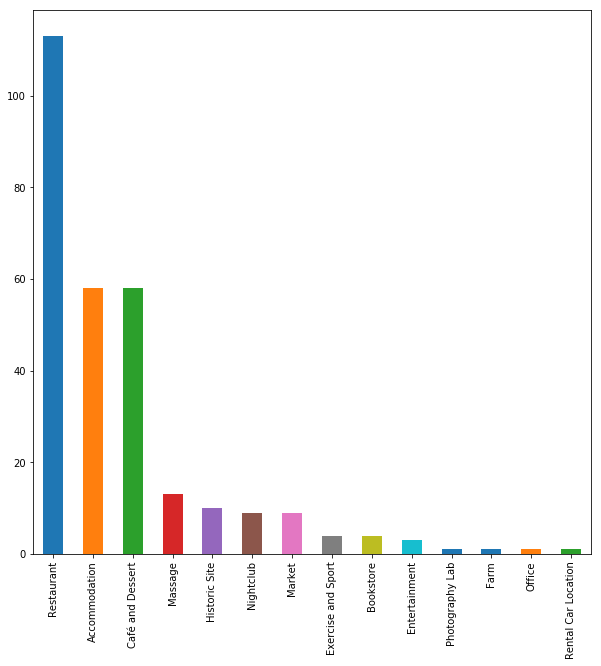

In [41]:
df['Rough Category'].value_counts().plot(kind='bar', figsize=(10, 10))

In [97]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [102]:
labels, uniques = pd.factorize(df['Rough Category'])
df['label'] = labels 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [112]:
k = len(uniques)

# create map
map_cates = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for poi, lat, lon, cate, no in zip(df['Venue'], df['Venue Latitude'], df['Venue Longitude'], df['Rough Category'], df['label']):
    label = folium.Popup(str(poi) + ' Type ' + str(cate), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[no-1],
        fill=True,
        fill_color=rainbow[no-1],
        fill_opacity=0.7).add_to(map_cates)
       
map_cates

## Find the distance between places

We can compute the distance between places using latitute and longtitue

In [42]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [43]:
df['Rough Category'].value_counts()

Restaurant             113
Accommodation           58
Café and Dessert        58
Massage                 13
Historic Site           10
Nightclub                9
Market                   9
Exercise and Sport       4
Bookstore                4
Entertainment            3
Photography Lab          1
Farm                     1
Office                   1
Rental Car Location      1
Name: Rough Category, dtype: int64

In [44]:
import itertools as it

df['AVG Distance'] = 0.0
categories = df['Rough Category'].unique()

for cate in categories:
    tmp = []
    ids = df[df['Rough Category'] == cate].index
    index_pair = list(it.combinations(ids, 2))
    for i, j in index_pair:
        lat1 = chiangmai_venues['Venue Latitude'][i]
        lon1 = chiangmai_venues['Venue Longitude'][i]
        lat2 = chiangmai_venues['Venue Latitude'][j]
        lon2 = chiangmai_venues['Venue Longitude'][j]
        dist = calculate_distance(lat1, lon1, lat2, lon2)
        tmp.append(dist)
    df.loc[ids, 'AVG Distance'] = np.mean(tmp)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWar

In [53]:
avg_df = df[['Rough Category', 'AVG Distance']].drop_duplicates()
avg_df.shape

(14, 2)

In [54]:
avg_df.set_index('Rough Category', inplace=True)
avg_df

,AVG Distance
Rough Category,
Market,0.884995
Restaurant,0.793864
Historic Site,0.498944
Bookstore,0.672438
Accommodation,0.761325
Massage,0.696462
Café and Dessert,0.758455
Nightclub,0.707460
Farm,NaN


In [56]:
avg_df['Count'] = np.nan
values = df['Rough Category'].value_counts()

for cate in avg_df.index:
    avg_df['Count'][cate] = values[cate]
avg_df

,AVG Distance,Count
Rough Category,,
Market,0.884995,9.0
Restaurant,0.793864,113.0
Historic Site,0.498944,10.0
Bookstore,0.672438,4.0
Accommodation,0.761325,58.0
Massage,0.696462,13.0
Café and Dessert,0.758455,58.0
Nightclub,0.707460,9.0
Farm,NaN,1.0


### Ignore Category that contains only one place

In [57]:
avg_df.dropna(inplace=True)
avg_df

,AVG Distance,Count
Rough Category,,
Market,0.884995,9.0
Restaurant,0.793864,113.0
Historic Site,0.498944,10.0
Bookstore,0.672438,4.0
Accommodation,0.761325,58.0
Massage,0.696462,13.0
Café and Dessert,0.758455,58.0
Nightclub,0.707460,9.0
Entertainment,0.913857,3.0


In [64]:
avg_df.sort_values(by='Normalized', ascending=False)

,AVG Distance,Count,Normalized
Rough Category,,,
Restaurant,0.793864,113.0,142.341786
Café and Dessert,0.758455,58.0,76.471285
Accommodation,0.761325,58.0,76.183016
Historic Site,0.498944,10.0,20.042316
Massage,0.696462,13.0,18.665759
Nightclub,0.707460,9.0,12.721565
Market,0.884995,9.0,10.169551
Bookstore,0.672438,4.0,5.948508
Exercise and Sport,0.848114,4.0,4.716347


In [70]:
from sklearn.preprocessing import StandardScaler

X = avg_df.values
scaled = StandardScaler().fit_transform(X)
scaled

array([[ 1.1506507 , -0.54970231],
       [ 0.35265117,  2.44344118],
       [-2.22984789, -0.52092209],
       [-0.71063353, -0.69360344],
       [ 0.06771663,  0.86052875],
       [-0.50025644, -0.43458141],
       [ 0.04258584,  0.86052875],
       [-0.40395392, -0.54970231],
       [ 1.40338793, -0.72238367],
       [ 0.8276995 , -0.69360344]])

In [87]:
scaled_df = pd.DataFrame(scaled, columns=['avg', 'count'], index=avg_df.index)

In [90]:
scaled_df['normalized'] = scaled_df['count'] / scaled_df['avg']

In [91]:
scaled_df

,avg,count,normalized
Rough Category,,,
Market,1.150651,-0.549702,-0.477732
Restaurant,0.352651,2.443441,6.928777
Historic Site,-2.229848,-0.520922,0.233613
Bookstore,-0.710634,-0.693603,0.976035
Accommodation,0.067717,0.860529,12.707790
Massage,-0.500256,-0.434581,0.868717
Café and Dessert,0.042586,0.860529,20.206920
Nightclub,-0.403954,-0.549702,1.360805
Entertainment,1.403388,-0.722384,-0.514743


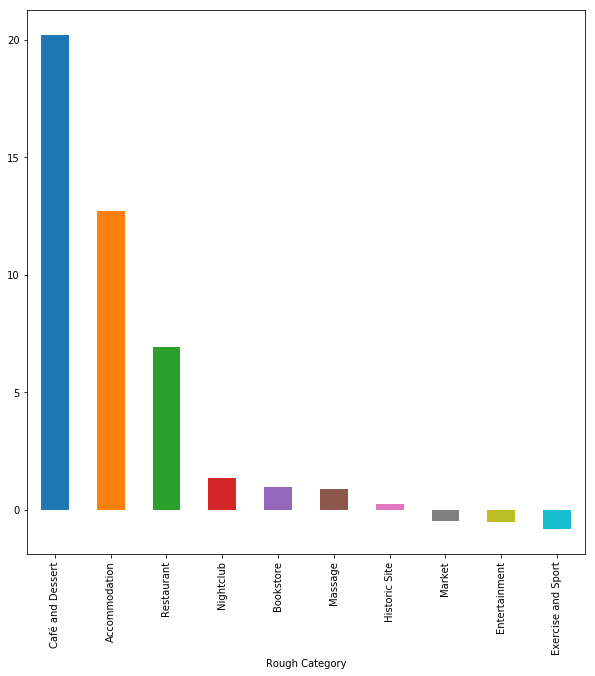

In [94]:
scaled_df['normalized'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 10))

## Conclusion

There are 3 kinds of business: Market, Entertainment and Exercise and Sport. These kinds of business are lacked in Chiang Mai. It should be an opportunity to start a new business with any kind of those. The normalized value show the negative numbers, it represents the small numbers of the business in Chiang Mai.